# Classification des documents du procès des groupes américains du tabac

## Mélodie Boillet
### 22/12/2018

## 1. Stockage des fichiers texte et de leurs contenus dans des dictionnaires.

In [65]:
def get_data():
    texts_names = dict()
    texts_contents = dict()
    text_category_couples = []
    # Iterate on all the directories.
    for dir_name in os.listdir("./data/Tobacco3482-OCR"):
        # Get all the file names in the current "dir_name" directory.
        file_names = os.listdir("./data/Tobacco3482-OCR/"+dir_name)
        names = []
        contents = []
        # Iterate on all the files of the current "dir_name" directory.
        for file_name in file_names:
            names.append(file_name)
            with open("./data/Tobacco3482-OCR/"+dir_name+"/"+file_name, 'r', encoding="utf8") as file:
                data = file.read()
                text_category_couples.append((data, dir_name))
                contents.append(data)
        # Create a dictionary with the categories as keys and an array of the names of the text files as values.
        texts_names[dir_name] = names
        # Create a dictionary with the categories as keys and an array of the contents of the text files as values.
        texts_contents[dir_name] = contents
    return texts_names, texts_contents, text_category_couples

## 2. Analyse des données.

In [66]:
def data_analysis(texts_names, texts_contents):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # Repartition of the texts by category.
    ax1.bar(list(texts_names.keys()), [len(texts_names[category]) for category in texts_names.keys()])
    ax1.set_xlabel('Categorie')
    ax1.set_ylabel('Nombre de textes')
    ax1.set_title('Nombre de textes par categorie\n')

    # Mean number of letters in the texts by category.
    mean_lengths = dict()
    for class_name in list(texts_names.keys()):
        sum_lengths = 0
        mean_length = 0
        for index, text in enumerate(texts_contents[class_name]):
            sum_lengths += len(text)
        mean_length = sum_lengths / (index + 1)
        mean_lengths[class_name] = mean_length

    ax2.bar(list(mean_lengths.keys()), list(mean_lengths.values()))
    ax2.set_xlabel('Categorie')
    ax2.set_ylabel('Nombre moyen de lettres')
    ax2.set_title('Nombre moyen de lettres par categorie\n')
    plt.show()

## 3. Pré-traitement des données.

In [67]:
def BoW_vectors(train, dev, test):
    # Create text vectors in a Bag of words representation.
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(train)
    X_train_counts = vectorizer.transform(train)
    X_dev_counts = vectorizer.transform(dev)
    X_test_counts = vectorizer.transform(test)
    return X_train_counts, X_dev_counts, X_test_counts

In [68]:
def TFIDF_vectors(train, dev, test):
    # Create text vectors in a TF-IDF representation.
    tf_transformer = TfidfTransformer().fit(train)
    X_train_tf = tf_transformer.transform(train)
    X_dev_tf = tf_transformer.transform(dev)
    X_test_tf = tf_transformer.transform(test)
    return X_train_tf, X_dev_tf, X_test_tf

In [69]:
def vectors(train, dev, test):
    X_train_counts, X_dev_counts, X_test_counts = BoW_vectors(train, dev, test)
    X_train_tf, X_dev_tf, X_test_tf = TFIDF_vectors(X_train_counts, X_dev_counts, X_test_counts)
    return X_train_counts, X_dev_counts, X_test_counts, X_train_tf, X_dev_tf, X_test_tf

## 4. Entrainement et test d'un classifieur Naive Bayes.

In [70]:
def train_test(X_train, X_dev, X_test, y_train, y_dev, y_test):
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    dev_predict = clf.predict(X_dev)
    test_predict = clf.predict(X_test)
    print('    Accuracy train set : {0:.2f} %'.format(len(train_predict[train_predict == y_train]) / len(y_train)*100))
    print('    Accuracy dev set : {0:.2f} %'.format(len(dev_predict[dev_predict == y_dev]) / len(y_dev)*100))
    print('    Accuracy test set : {0:.2f} %'.format(len(test_predict[test_predict == y_test]) / len(y_test)*100))

## 5. Analyse des erreurs.

In [100]:
# Classification report.
def error_analysis(y, predict, names):
    for index, current_y in enumerate(y):
        print("\nScores per class "+names[index]+" :")
        print(classification_report(current_y, predict[index]))

## Programme principal.

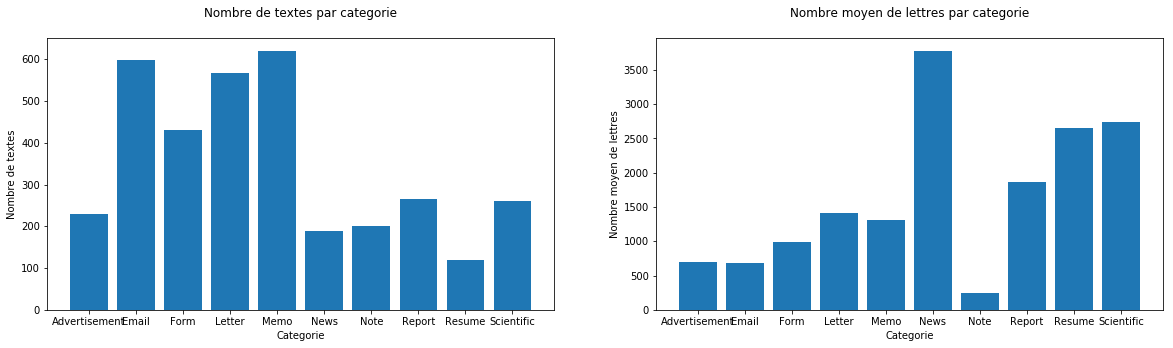

Train : 2088 = 59.97 %
Dev : 697 = 20.02 %
Test : 697 = 20.02 %

Bag-of-word representation :
    Accuracy train set : 82.76 %
    Accuracy dev set : 71.16 %
    Accuracy test set : 72.45 %

TF-IDF representation :
    Accuracy train set : 74.66 %
    Accuracy dev set : 66.86 %
    Accuracy test set : 65.71 %

Scores per class Train :
               precision    recall  f1-score   support

Advertisement       0.08      0.06      0.07       142
        Email       0.18      0.18      0.18       366
         Form       0.13      0.13      0.13       283
       Letter       0.14      0.21      0.17       318
         Memo       0.17      0.24      0.20       369
         News       0.06      0.04      0.04       110
         Note       0.06      0.02      0.03       117
       Report       0.07      0.02      0.03       167
       Resume       0.06      0.06      0.06        70
   Scientific       0.05      0.04      0.05       146

  avg / total       0.12      0.14      0.13      2088



In [102]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

texts_names, texts_contents, text_category_couples = get_data()
data_analysis(texts_names, texts_contents)

# Split the data.
X, y = zip(*text_category_couples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=(0.20 / (0.60 + 0.20)))
print('Train : {0:0} = {1:.2f} %'.format(len(X_train), (len(X_train)/len(X)*100)))
print('Dev : {0:0} = {1:.2f} %'.format(len(X_dev), (len(X_dev)/len(X)*100)))
print('Test : {0:0} = {1:.2f} %'.format(len(X_test), (len(X_test)/len(X)*100)))

X_train_counts, X_dev_counts, X_test_counts, X_train_tf, X_dev_tf, X_test_tf = vectors(X_train, X_dev, X_test)

clf = MultinomialNB()
# Bag of words representation.
print("\nBag-of-word representation :")
train_test(X_train_counts, X_dev_counts, X_test_counts, y_train, y_dev, y_test)
# TF-IDF representation.
print("\nTF-IDF representation :")
train_test(X_train_tf, X_dev_tf, X_test_tf, y_train, y_dev, y_test)

error_analysis([y_train, y_dev, y_test], [train_predict, dev_predict, test_predict], ['Train', 'Dev', 'Test'])

# Confusion matrix.
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
#ax1.matshow(confusion_matrix(y_train, train_predict))
#ax1.set_title('Confusions Train\n')
#ax2.matshow(confusion_matrix(y_dev, dev_predict))
#ax2.set_title('Confusions Dev\n')
#ax3.matshow(confusion_matrix(y_test, test_predict))
#ax3.set_title('Confusions Test\n')
#plt.show()